In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from bs4 import BeautifulSoup as bs
import requests
from urllib.request import Request, urlopen

In [12]:
url = Request('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
soup = urlopen(url).read()
data = bs(soup)

In [23]:
df = pd.DataFrame(columns=['Rank', 'Country', 'GDP_(US$mln)'])

In [90]:
# function to replace ',' in data

import re
def num(element):
    return re.sub('[^\w\s.]', '', element)

In [50]:
tables = data.find_all('table', attrs={'class':'wikitable sortable'})

In [91]:
rank = []
country = []
gdp = []

for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if len(cells) > 0:
            rank.append(cells[0].text.strip())
            country.append(cells[1].text.strip())
            dd = cells[2]
            gdp.append(num(dd.text.strip()))

In [85]:
df['Rank'] = rank

In [93]:
df['Country'] = country
df['GDP_(US$mln)'] = gdp

In [95]:
df.set_index('Rank')

,Country,GDP_(US$mln)
Rank,,
,World[19],87265226
1,United States,21439453
—,European Union[23][n 1],18705132
2,China[n 2],14140163
3,Japan,5154475
...,...,...
189,Marshall Islands,209
190,Nauru,182
191,Kiribati,180


In [102]:
df = df.iloc[:194]

In [112]:
df.drop('Rank', axis=1)

,Country,GDP_(US$mln)
0,World[19],87265226
1,United States,21439453
2,European Union[23][n 1],18705132
3,China[n 2],14140163
4,Japan,5154475
...,...,...
189,Palau,291
190,Marshall Islands,220
191,Kiribati,184
192,Nauru,108


In [163]:
df['GDP_(US$mln)'].replace('Na', '', regex=True, inplace=True)


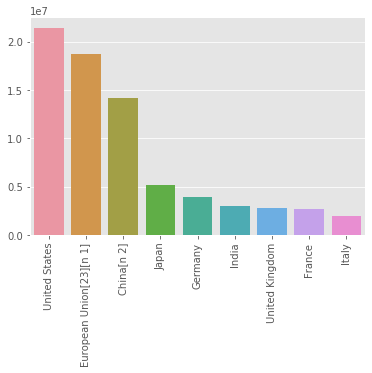

In [167]:
sns.barplot(x=df.iloc[1:10,1].values, y=df.iloc[1:10,2].values, data=df)
plt.xticks(rotation=90)
plt.show()

array(['World[19]', 'United States'], dtype=object)